In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
# data = pd.read_pickle("maha_pr_masked")
# model = VAR(data)

In [0]:
!pip install -q rasterio

In [0]:
import xarray as xr
import os
from netCDF4 import Dataset 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# get_ipython().run_line_magic('matplotlib', 'inline')
#plt.rcParams['figure.figsize'] = [50, 50]
from networkx import spring_layout
# import mplleaflet
# as get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['figure.figsize'] = [10, 10]
import statsmodels.api as sm
# import cdo
import pandas as pd
import salem
import networkx as nx

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving INDIA.shp to INDIA.shp
Saving INDIA.shx to INDIA.shx
Saving INDIA.sbx to INDIA.sbx
Saving INDIA.sbn to INDIA.sbn
Saving INDIA.prj to INDIA.prj
Saving INDIA.dbf to INDIA.dbf


In [0]:
shape=salem.read_shapefile("rajasthan_administrative.shp")
daa = salem.open_xr_dataset("india_pre (1).nc")
das=daa.salem.subset(shape = shape,margin = 2)

In [0]:
daa=das.salem.roi(shape=shape)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


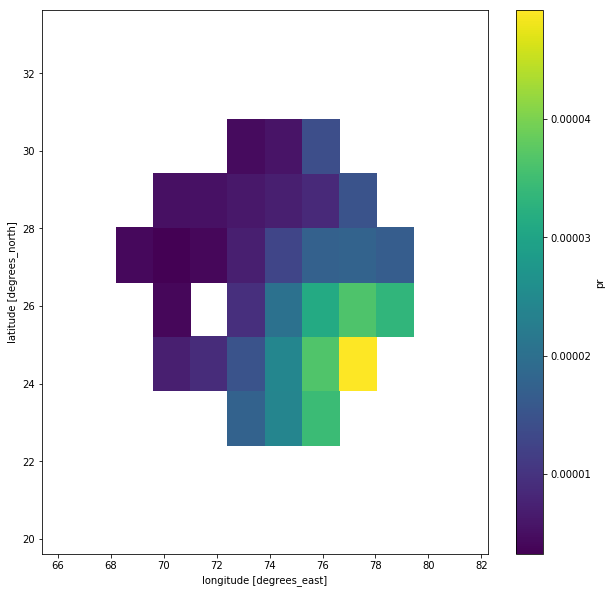

In [0]:
daa.pr.mean(dim='time').plot()

In [0]:
lati=daa["lat"].values
loni=daa["lon"].values

In [0]:
c=0
array=[]
G=nx.Graph()
for i in range(len(lati)):
    for j in range(len(loni)):
        if(daa.isel(lat=i,lon=j).pr.values[0]>0):
#             print(daa.isel(lat=i,lon=j).tas.values[0])
            c+=1
            G.add_node((loni[j],lati[i]),pos=(loni[j],lati[i]))
            array.append((loni[j],lati[i]))

In [0]:
G.nodes

NodeView(((77.34375, 9.104988856048523), (77.34375, 10.505756145243598), (78.75, 10.505756145243598), (75.9375, 11.906523334953757), (77.34375, 11.906523334953757), (78.75, 11.906523334953757), (75.9375, 13.307290410446194), (77.34375, 13.307290410446194), (78.75, 13.307290410446194), (80.15625, 13.307290410446194), (74.53125, 14.708057356404804), (75.9375, 14.708057356404804), (77.34375, 14.708057356404804), (78.75, 14.708057356404804), (74.53125, 16.108824156841283), (75.9375, 16.108824156841283), (77.34375, 16.108824156841283), (78.75, 16.108824156841283), (80.15625, 16.108824156841283), (74.53125, 17.509590794998555), (75.9375, 17.509590794998555), (77.34375, 17.509590794998555), (78.75, 17.509590794998555), (80.15625, 17.509590794998555), (81.5625, 17.509590794998555), (82.96875, 17.509590794998555), (73.125, 18.91035725324536), (74.53125, 18.91035725324536), (75.9375, 18.91035725324536), (77.34375, 18.91035725324536), (78.75, 18.91035725324536), (80.15625, 18.91035725324536), (81

In [0]:
nx.draw_networkx_nodes(G, nx.get_node_attributes(G, 'pos'),alpha = 0.8,with_labels=True,node_shape = "o",figsize=(1000, 100),dpi=80,node_size=100)

In [0]:
df=pd.DataFrame()
for i in range(len(lati)):
    for j in range(len(loni)):
        if(daa.isel(lat=i,lon=j).pr.values[0]>0):
#             print(daa.isel(lat=i,lon=j).pr.values[0])
            arr=daa.isel(lat=i,lon=j).pr.values
            df[str(loni[j])+","+str(lati[i])]=arr[:3650]

In [0]:
daa.close()

In [0]:
df

,"73.125,23.112655356577648","74.53125,23.112655356577648","75.9375,23.112655356577648","70.3125,24.513420897062915","71.71875,24.513420897062915","73.125,24.513420897062915","74.53125,24.513420897062915","75.9375,24.513420897062915","77.34375,24.513420897062915","70.3125,25.914186151846668","73.125,25.914186151846668","74.53125,25.914186151846668","75.9375,25.914186151846668","77.34375,25.914186151846668","78.75,25.914186151846668","68.90625,27.314951095120396","70.3125,27.314951095120396","71.71875,27.314951095120396","73.125,27.314951095120396","74.53125,27.314951095120396","75.9375,27.314951095120396","77.34375,27.314951095120396","78.75,27.314951095120396","70.3125,28.715715699055192","71.71875,28.715715699055192","73.125,28.715715699055192","74.53125,28.715715699055192","75.9375,28.715715699055192","77.34375,28.715715699055192","73.125,30.116479933546326","74.53125,30.116479933546326","75.9375,30.116479933546326"
0,3.020558e-05,2.105739e-05,8.540760e-06,1.012375e-06,3.497295e-06,3.979552e-05,4.699259e-05,2.254834e-05,1.546173e-06,3.037124e-06,1.884857e-05,1.062441e-04,7.889159e-05,1.527765e-05,3.681418e-08,2.032112e-05,5.540450e-06,5.061873e-06,3.438392e-05,9.367226e-05,1.188896e-04,1.172514e-05,9.203461e-08,1.277433e-05,6.773706e-06,3.285615e-05,1.280562e-04,1.777546e-04,2.954293e-05,9.829237e-06,9.680141e-05,2.077761e-04
1,7.472106e-06,1.299994e-05,5.947186e-06,1.595150e-15,1.595150e-15,3.011716e-06,1.130347e-05,1.399114e-05,4.765373e-06,1.595150e-15,1.595150e-15,1.645007e-05,4.898804e-06,2.964062e-05,4.021975e-06,1.334305e-06,1.595150e-15,1.595150e-15,8.005827e-07,4.029600e-05,1.713628e-05,2.619049e-05,6.595277e-06,1.105567e-06,8.005827e-07,1.848965e-06,8.577672e-07,1.524920e-06,3.450130e-06,2.859224e-07,7.624597e-08,5.241911e-06
2,1.357090e-05,1.509950e-06,1.062557e-06,8.015782e-07,1.314215e-05,1.599428e-05,1.118481e-06,9.507090e-07,3.728271e-08,2.982617e-07,1.528591e-06,8.388608e-07,4.994174e-16,9.879917e-07,4.994174e-16,4.436642e-06,2.236962e-07,5.033165e-07,7.456541e-08,1.677722e-07,7.885292e-06,2.442017e-06,2.050549e-07,1.770929e-06,7.456541e-08,4.994174e-16,1.864135e-07,4.994174e-16,4.994174e-16,2.236962e-07,4.994174e-16,4.994174e-16
3,3.652020e-06,3.435068e-07,2.711896e-07,4.700619e-07,1.533125e-05,1.375835e-05,7.231722e-08,3.615861e-08,1.644884e-16,1.807931e-08,2.052001e-05,2.042962e-06,3.435068e-07,1.807931e-08,1.644884e-16,9.220446e-07,1.627137e-07,7.774102e-07,5.694981e-05,5.722100e-05,2.433475e-05,3.127720e-06,3.615861e-08,4.700619e-07,1.030520e-06,8.045291e-06,3.684562e-05,1.202274e-05,8.858860e-07,4.791016e-06,3.380830e-06,3.471227e-06
4,2.225646e-06,4.121566e-08,2.060783e-08,2.060783e-08,7.934015e-06,3.606371e-06,4.945880e-07,2.147176e-20,2.147176e-20,3.297253e-07,7.295173e-06,2.355475e-05,5.687762e-06,1.648627e-07,4.121566e-08,4.593486e-05,8.758328e-06,7.356996e-06,1.485825e-05,3.221004e-05,4.251396e-05,9.108662e-06,9.479603e-07,4.774835e-05,3.157120e-05,1.743423e-05,2.512095e-05,1.671295e-05,4.245213e-06,1.533223e-05,2.180309e-05,4.696525e-05
5,9.435410e-07,1.505650e-06,1.204520e-07,7.026369e-07,1.088083e-05,6.283581e-06,4.818082e-07,4.015068e-08,2.007534e-08,4.075294e-06,1.597997e-05,6.424108e-07,6.022602e-08,4.015068e-08,1.475673e-21,2.358852e-05,1.260731e-05,2.559606e-05,8.337288e-05,9.088106e-05,4.613313e-05,1.178422e-05,3.111678e-06,5.081068e-05,6.640922e-05,1.353479e-04,1.450644e-04,8.654479e-05,1.270769e-05,1.215361e-04,1.272576e-04,1.260932e-04
6,1.314023e-05,1.917763e-05,6.766375e-06,1.046732e-05,8.766381e-06,1.624304e-05,2.229913e-05,2.351409e-05,1.442995e-05,1.013087e-05,1.080377e-05,2.220567e-05,6.600020e-05,5.037398e-05,1.100938e-05,3.342066e-05,3.514029e-06,3.196271e-06,2.091595e-05,3.915900e-05,6.928993e-05,3.499076e-05,5.682260e-06,6.560767e-06,7.495350e-06,2.545802e-05,4.773846e-05,4.100947e-05,1.472902e-05,2.738326e-05,6.454225e-05,1.323368e-04
7,2.239214e-06,1.414022e-05,3.835691e-05,4.146693e-08,2.674617e-06,8.148252e-06,9.454461e-06,1.436829e-05,4.679543e-05,3.379555e-06,1.082287e

In [0]:
colum=df.columns.values
nodes=len(colum)
nodes
colum

array(['73.125,23.112655356577648', '74.53125,23.112655356577648',
       '75.9375,23.112655356577648', '70.3125,24.513420897062915',
       '71.71875,24.513420897062915', '73.125,24.513420897062915',
       '74.53125,24.513420897062915', '75.9375,24.513420897062915',
       '77.34375,24.513420897062915', '70.3125,25.914186151846668',
       '73.125,25.914186151846668', '74.53125,25.914186151846668',
       '75.9375,25.914186151846668', '77.34375,25.914186151846668',
       '78.75,25.914186151846668', '68.90625,27.314951095120396',
       '70.3125,27.314951095120396', '71.71875,27.314951095120396',
       '73.125,27.314951095120396', '74.53125,27.314951095120396',
       '75.9375,27.314951095120396', '77.34375,27.314951095120396',
       '78.75,27.314951095120396', '70.3125,28.715715699055192',
       '71.71875,28.715715699055192', '73.125,28.715715699055192',
       '74.53125,28.715715699055192', '75.9375,28.715715699055192',
       '77.34375,28.715715699055192', '73.125,30.1164799335

In [0]:
model = VAR(df)
results = model.fit(maxlags=20, ic='aic')

In [0]:
neew=[]
for i in range(nodes):
  print(results.test_causality('73.125,23.112655356577648', colum[i], kind='f'))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: 73.125,23.112655356577648 does not Granger-cause 73.125,23.112655356577648: reject at 5% significance level. Test statistic: 2.319, critical value: 1.571>, p-value: 0.001>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: 74.53125,23.112655356577648 does not Granger-cause 73.125,23.112655356577648: reject at 5% significance level. Test statistic: 8.757, critical value: 1.571>, p-value: 0.000>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: 75.9375,23.112655356577648 does not Granger-cause 73.125,23.112655356577648: reject at 5% significance level. Test statistic: 5.230, critical value: 1.571>, p-value: 0.000>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: 70.3125,24.513420897062915 does not Granger-cause 73.125,23.112655356577648: reject at 5% significance level. Test statistic: 12.588, critica

In [0]:
neew

In [0]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Jul, 2019
Time:                     08:04:07
--------------------------------------------------------------------
No. of Equations:         32.0000    BIC:                   -658.778
Nobs:                     3630.00    HQIC:                  -681.321
Log likelihood:       1.11493e+06    FPE:               5.50064e-302
AIC:                     -693.796    Det(Omega_mle):    3.02329e-304
--------------------------------------------------------------------
Results for equation 73.125,23.112655356577648
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
const                                   0.000003         0.000001            2.639           0.008
L1.73.125,23.112655356577648            0.116184         0.041419  

In [0]:
results.pvalues

In [0]:
imp=results.pvalues.iloc[449:]

In [0]:
imp

In [0]:
colum


In [0]:
len(imp.iloc[0])

32

In [0]:
count=0
for i in range(nodes):
    for j in range(nodes):
        print(imp.iloc[i][j])
        if(imp.iloc[i][j]<0.05):
            
            G.add_edge((float(colum[i].split(",")[0]),float(colum[i].split(",")[1])),(float(colum[j].split(",")[0]),float(colum[j].split(",")[1])))
            count+=1
     

0.6575911165076285
0.4142662795778004
0.1443059448828865
0.16632568639465872
0.7819718413467478
0.007560196304636744
0.05772946853988087
0.3548486737729458
0.4280485058400977
0.7341273248488036
0.1782589821743915
0.005374275823509426
0.366493982446895
0.9923521995602618
0.41012970968603824
0.8498692537090706
0.6370577310683404
0.5879896896513517
0.2696276137736777
0.001565631873552144
0.002116310656914259
0.13728286969654854
0.5981791695376709
0.08379376835873022
0.008374734272441285
0.006666647149098076
0.0005720658539013396
0.0017023455655674601
0.0019627225542375197
0.0015135111161746675
0.004846714121608544
0.11671445420565556
0.20248101289132947
0.01663938461430771
0.011480907847472353
0.40190602020697985
0.9527007058656747
0.03398925662842519
0.004724904509182503
0.07856641671694733
0.9539124196613069
0.30182747557496403
0.44044819074973085
0.026357335835104866
0.6807983677075893
0.10448284529073285
0.09883843096297522
0.7761274007178103
0.9772246592772812
0.4837295095282018
0.88

In [0]:
G.edges

In [0]:
 (float(colum[0].split(",")[0]),float(colum[0].split(",")[1]))

In [0]:
count


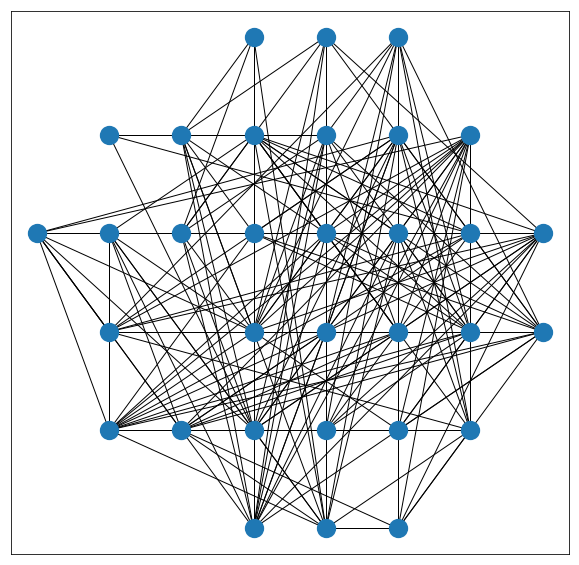

In [0]:
nx.draw_networkx(G ,nx.get_node_attributes(G, 'pos'),with_labels=False,edge_color="black", alpha=1,linewidths=2)
# plt.savefig("maha.png")

In [0]:
nx.density(G)

0.3870967741935484